In [6]:
import unittest
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

In [7]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates = True)
# Clean data
df = df.loc[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [8]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15,5))
    ax = sns.lineplot(data=df, x='date', y='value', color='r')
    ax.set(title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set(xlabel = 'Date', ylabel = 'Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('figures/line_plot.png')
    # return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df.index.year.values
    df_bar['Months'] = df.index.month_name()

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(15,5))
    ax = sns.barplot(data=df_bar, x='year', hue = 'Months', y='value', hue_order = months, errorbar=None, palette='bright')
    ax.set(xlabel = 'Years', ylabel = 'Average Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('figures/bar_plot.png')
    # return fig

def draw_box_plot():
  # Prepare data for box plots (this part is done!)
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]

  # Draw box plots (using Seaborn)
  df_box['monthnumber'] = df.index.month
  df_box = df_box.sort_values('monthnumber')
  fig, ax = plt.subplots(1, 2, figsize=(15, 9))

  sns.boxplot(y='value', x='year', data=df_box, ax=ax[0])
  ax[0].set(xlabel='Year',
            ylabel='Page Views',
            title="Year-wise Box Plot (Trend)")

  sns.boxplot(y='value', x='month', data=df_box, ax=ax[1])
  ax[1].set(xlabel='Month',
            ylabel='Page Views',
            title="Month-wise Box Plot (Seasonality)")

  # Save image and return fig (don't change this part)
  fig.savefig('figures/box_plot.png')
#   return fig


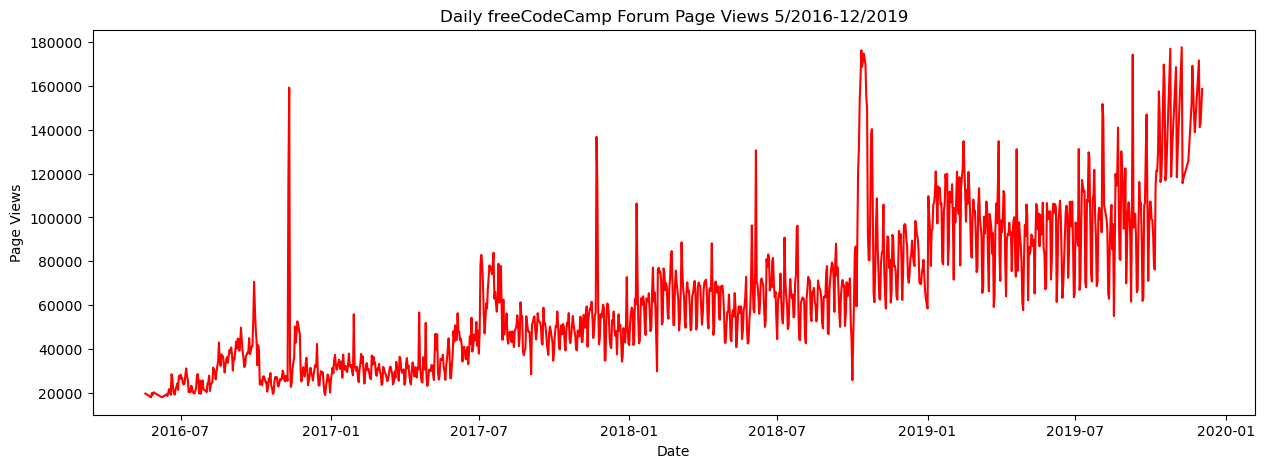

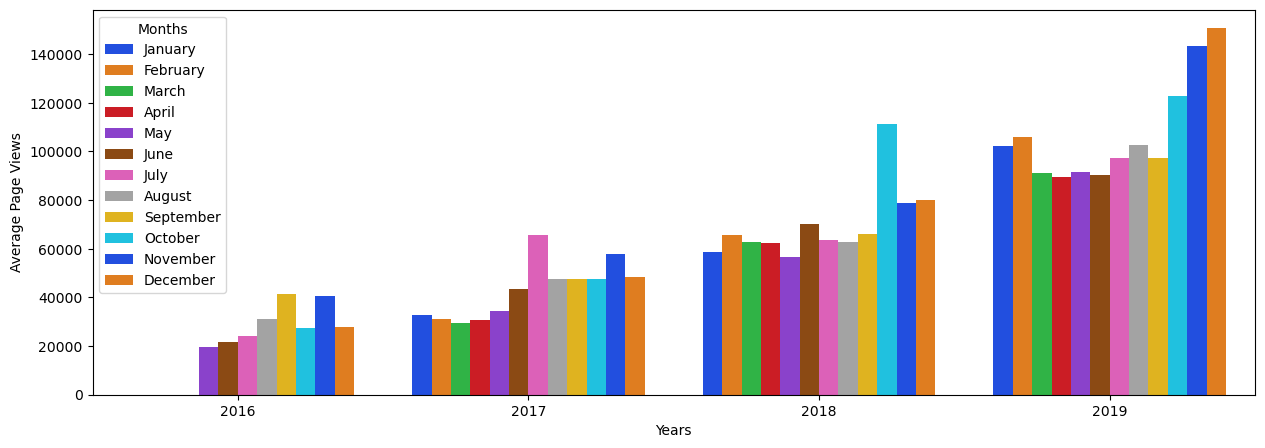

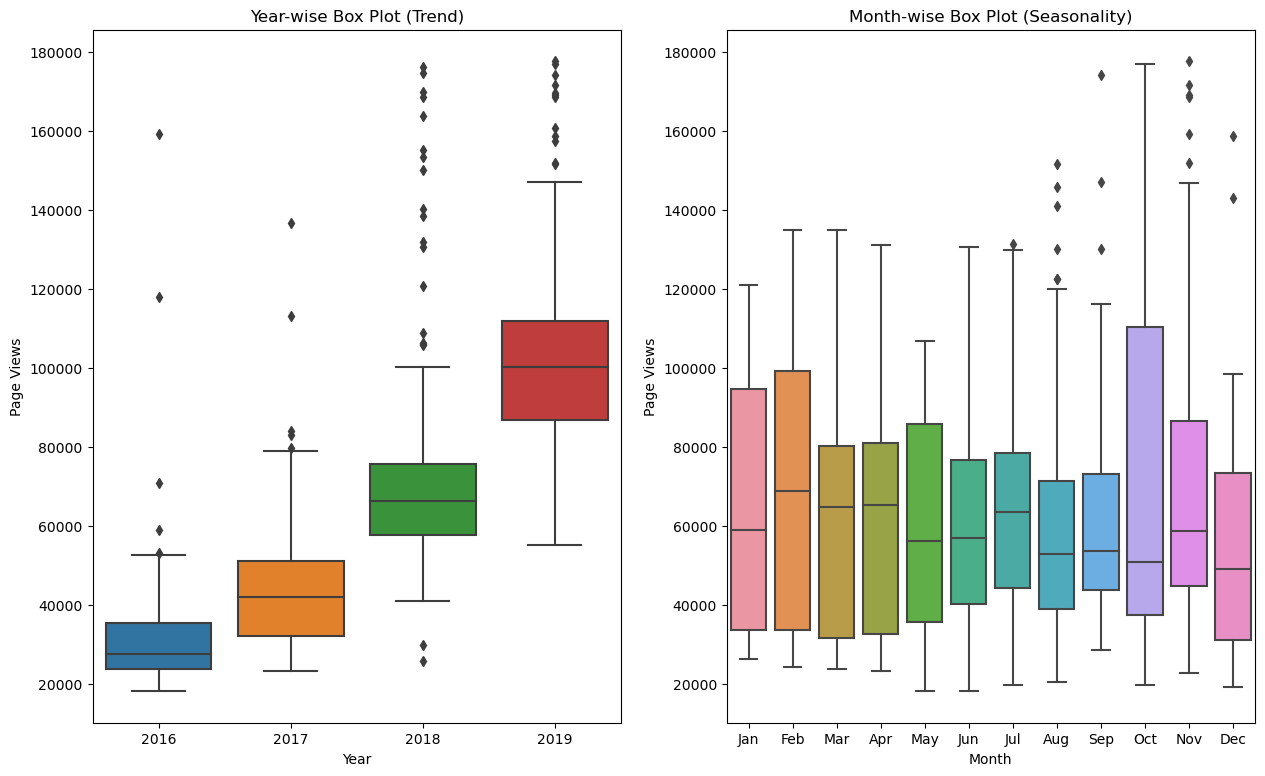

In [5]:
draw_line_plot()
draw_bar_plot()
draw_box_plot()

test_bar_plot_labels (__main__.BarPlotTestCase) ... ok
test_bar_plot_legend_labels (__main__.BarPlotTestCase) ... ok
test_bar_plot_number_of_bars (__main__.BarPlotTestCase) ... ok
test_box_plot_labels (__main__.BoxPlotTestCase) ... ok
test_box_plot_number (__main__.BoxPlotTestCase) ... ok
test_box_plot_number_of_boxes (__main__.BoxPlotTestCase) ... ok
test_box_plot_titles (__main__.BoxPlotTestCase) ... ok
test_data_cleaning (__main__.DataCleaningTestCase) ... ok
test_line_plot_data_quantity (__main__.LinePlotTestCase) ... ok
test_line_plot_labels (__main__.LinePlotTestCase) ... ok
test_line_plot_title (__main__.LinePlotTestCase) ... ok

----------------------------------------------------------------------
Ran 11 tests in 2.142s

OK


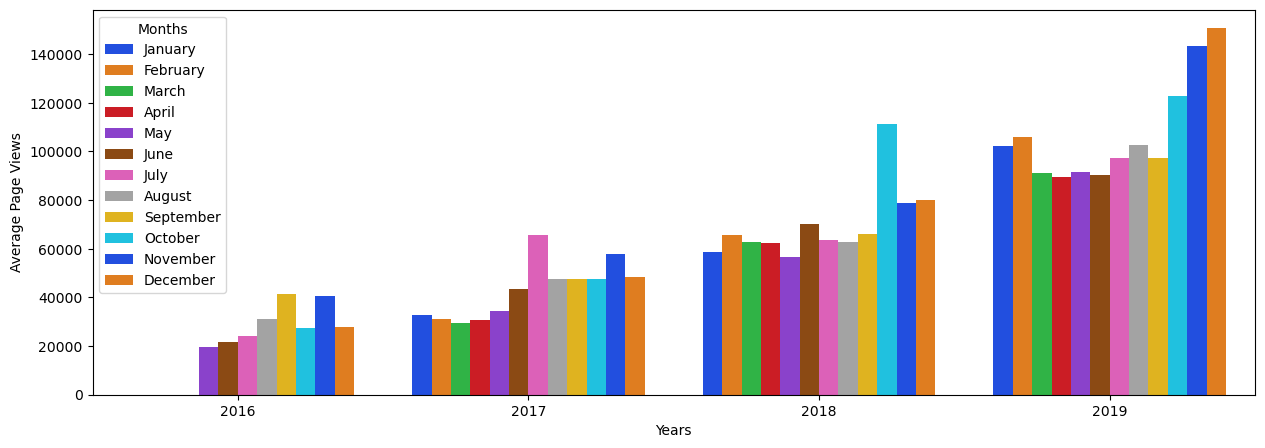

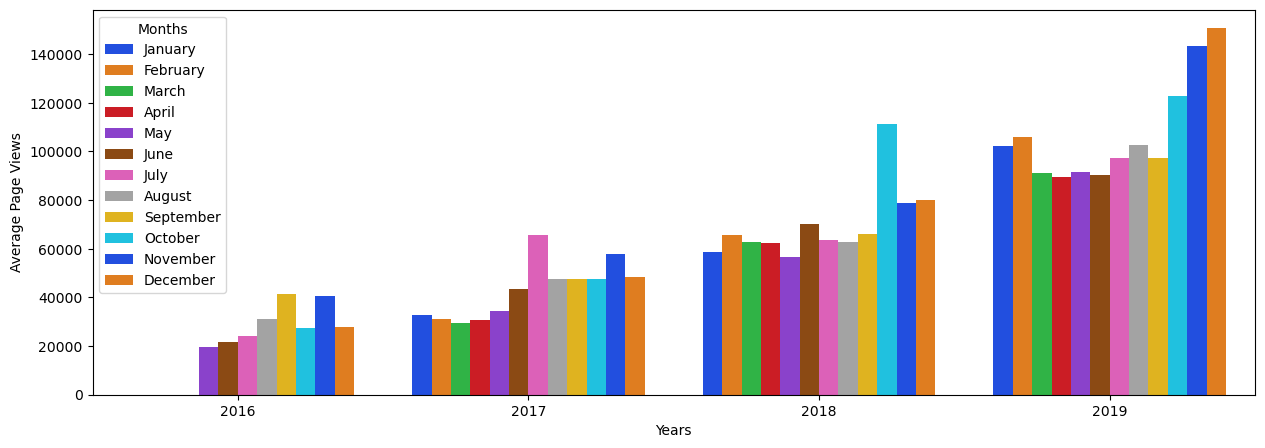

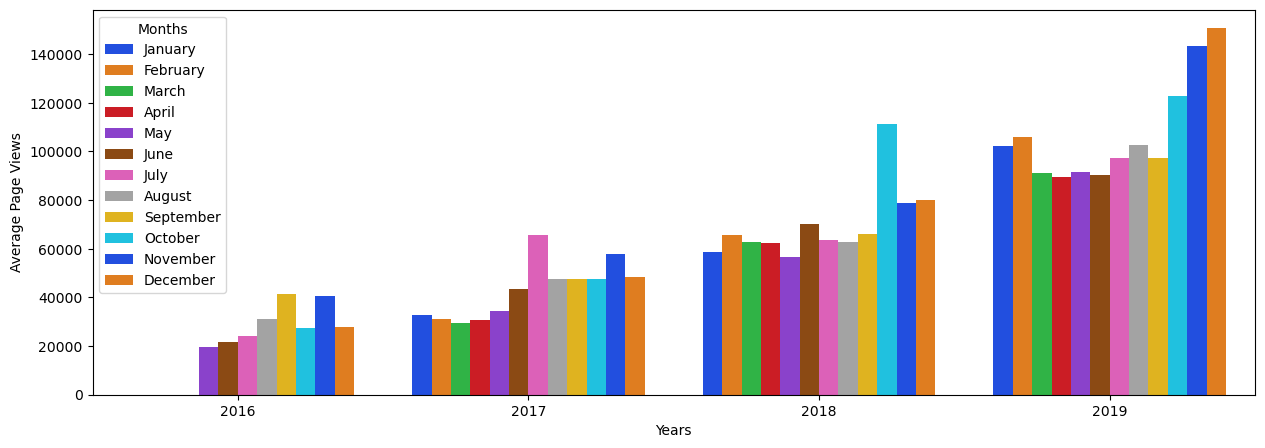

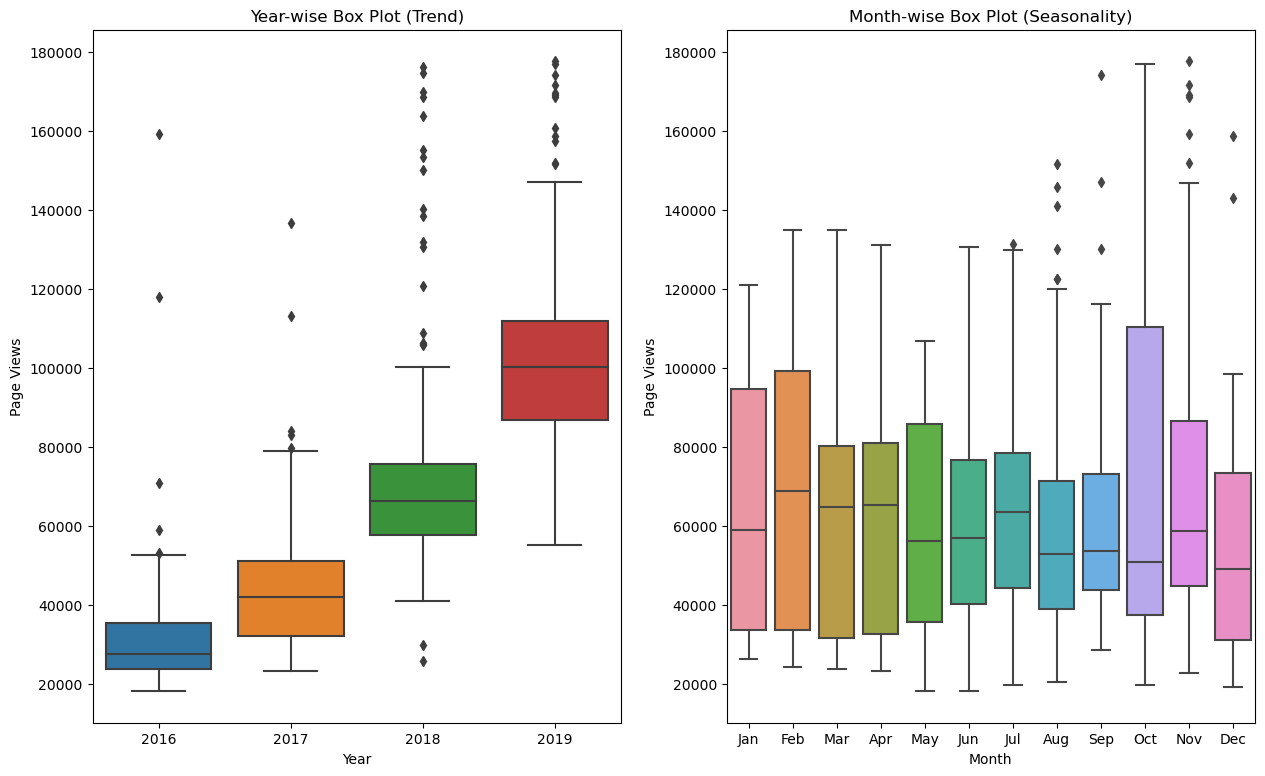

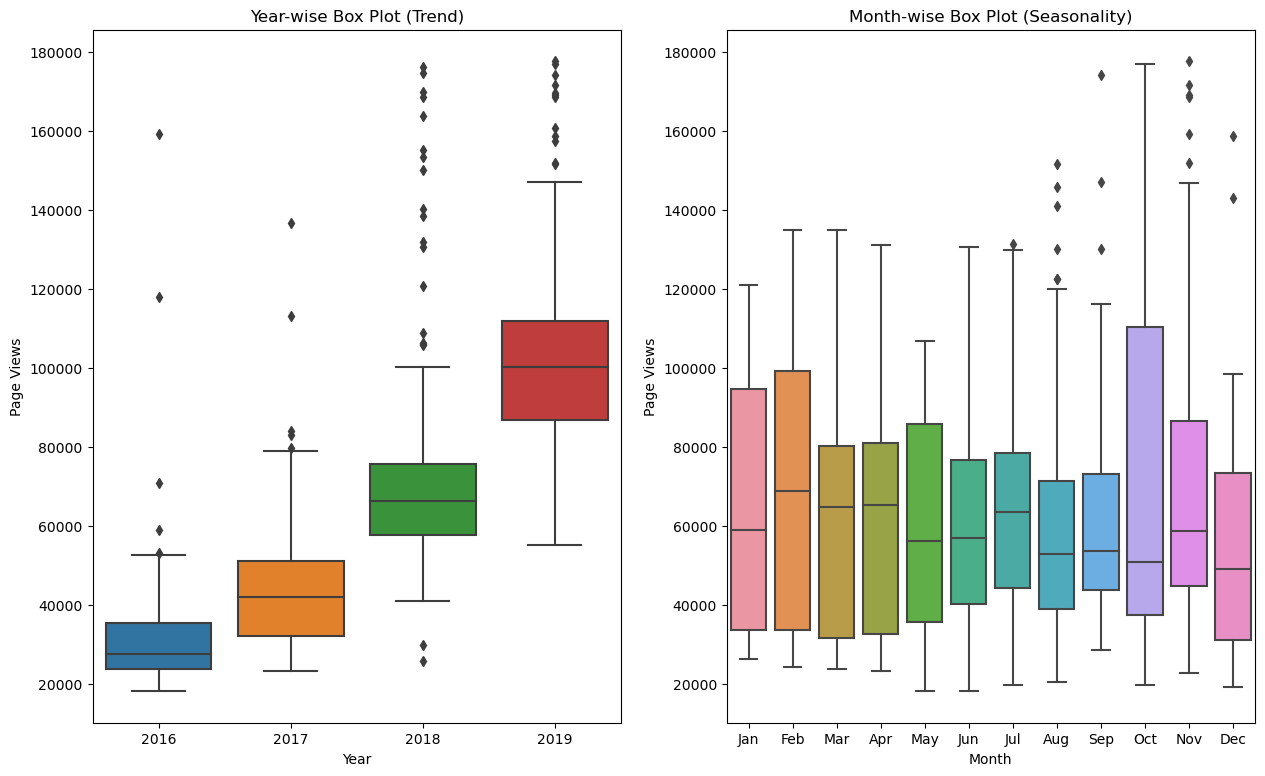

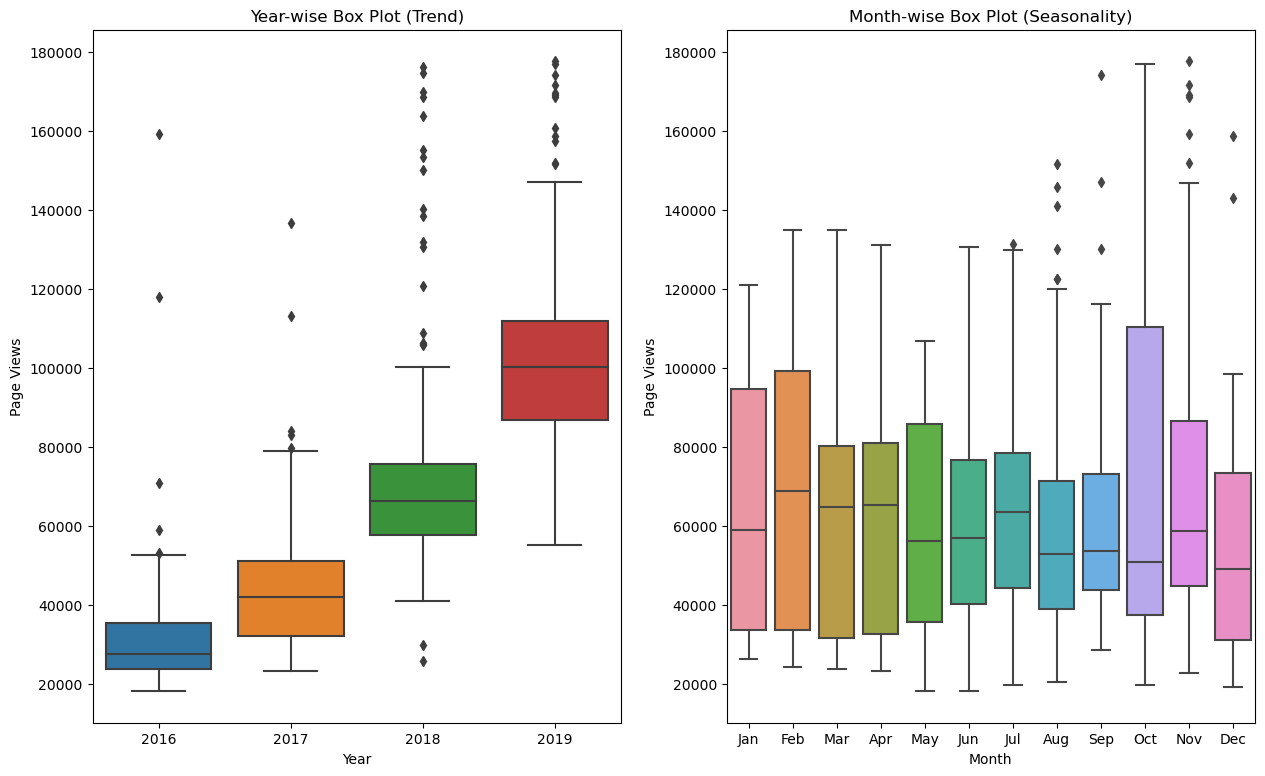

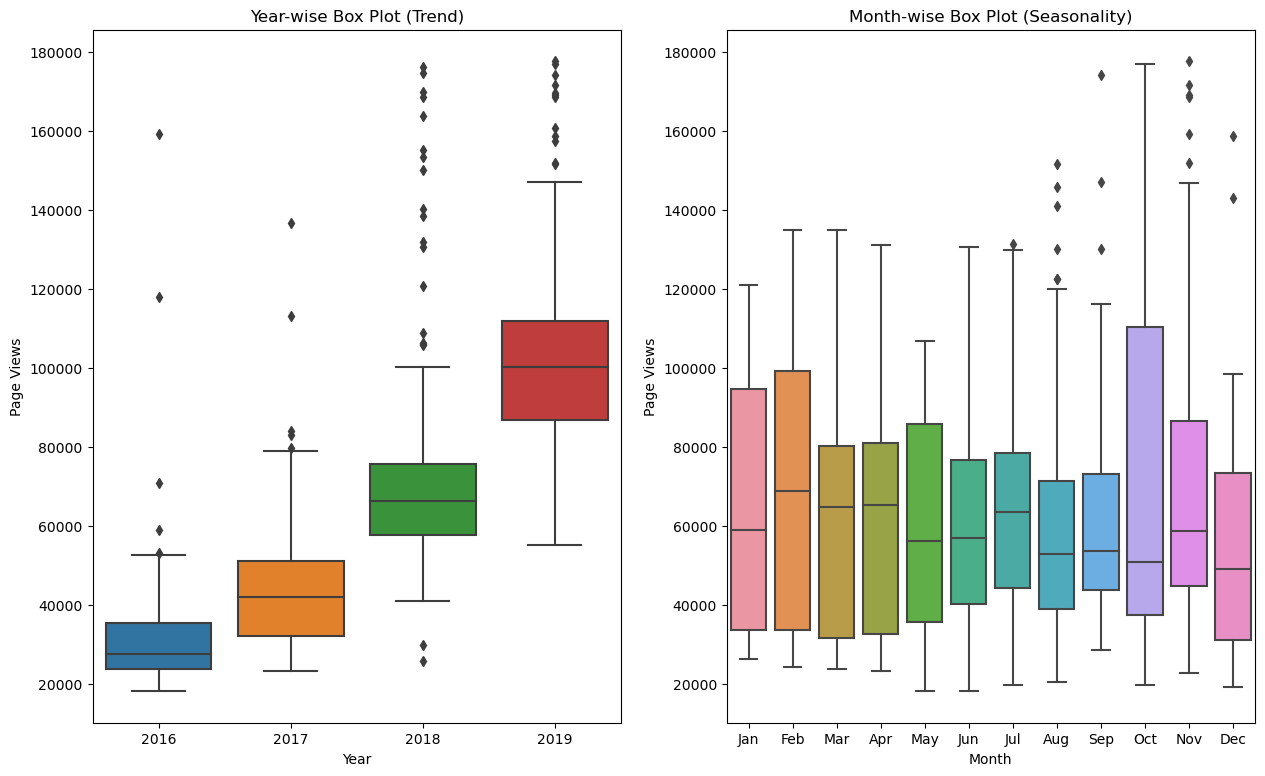

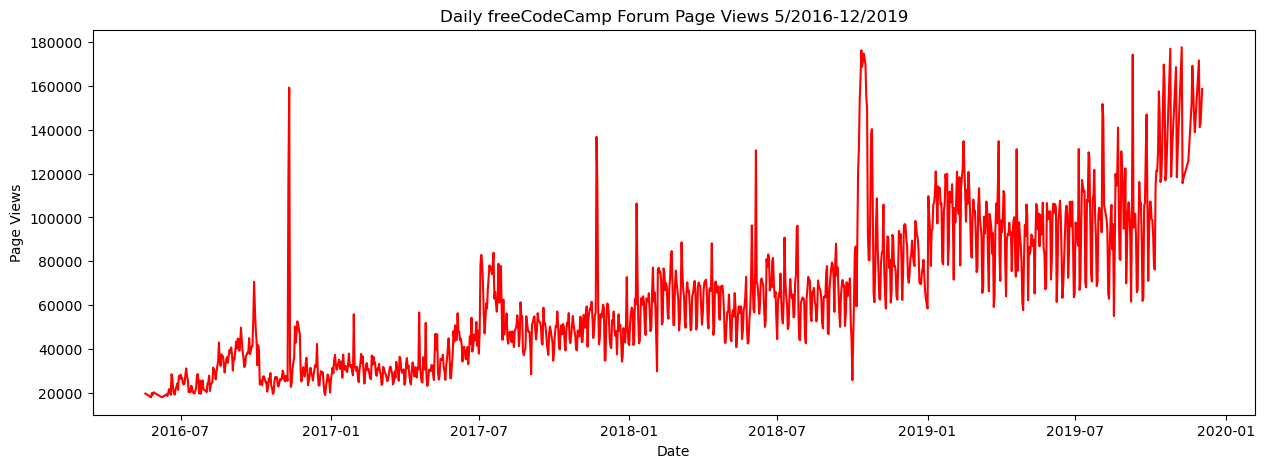

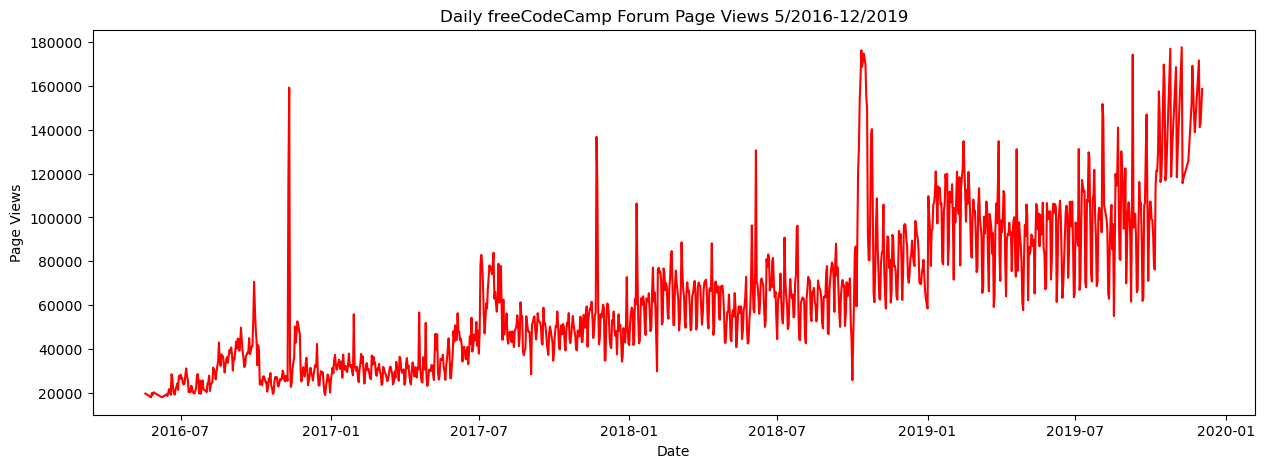

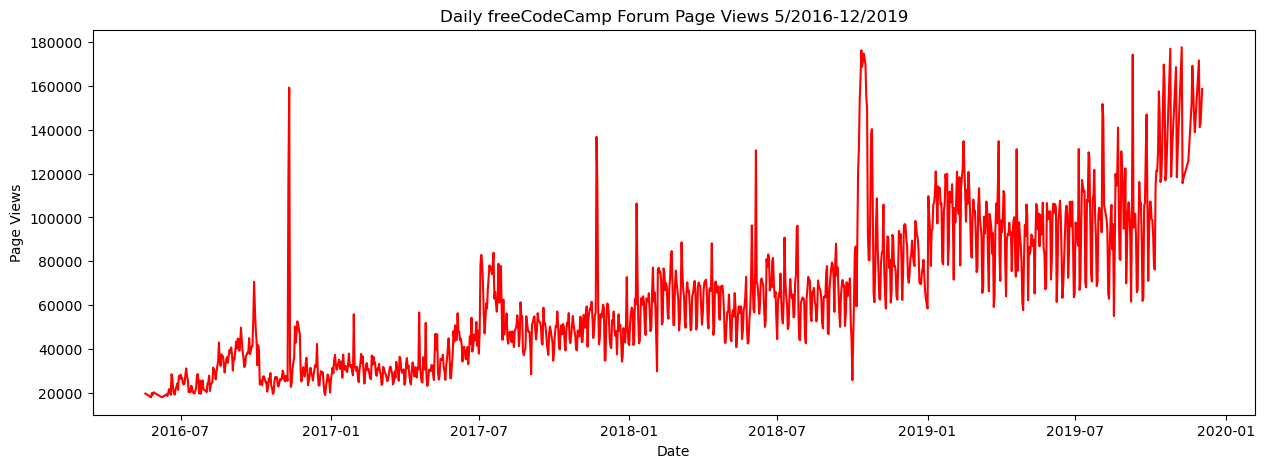

In [9]:
# running the test cases as per test_module.py
class DataCleaningTestCase(unittest.TestCase):
    def test_data_cleaning(self):
        actual = int(df.count(numeric_only=True))
        expected = 1238
        self.assertEqual(actual, expected, "Expected DataFrame count after cleaning to be 1238.")

class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_line_plot()
        self.ax = self.fig.axes[0]

    def test_line_plot_title(self):
        actual = self.ax.get_title()
        expected = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
        self.assertEqual(actual, expected, "Expected line plot title to be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'")
    
    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Date"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'Date'")
        actual = self.ax.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'Page Views'")

    def test_line_plot_data_quantity(self):
        actual = len(self.ax.lines[0].get_ydata())
        expected = 1238
        self.assertEqual(actual, expected, "Expected number of data points in line plot to be 1238.")


class BarPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_bar_plot()
        self.ax = self.fig.axes[0]

    def test_bar_plot_legend_labels(self):
        actual = []
        for label in self.ax.get_legend().get_texts():
          actual.append(label.get_text())
        expected = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        self.assertEqual(actual, expected, "Expected bar plot legend labels to be months of the year.")
    
    def test_bar_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Years"
        self.assertEqual(actual, expected, "Expected bar plot xlabel to be 'Years'")
        actual = self.ax.get_ylabel()
        expected = "Average Page Views"
        self.assertEqual(actual, expected, "Expected bar plot ylabel to be 'Average Page Views'")
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected bar plot secondary labels to be '2016', '2017', '2018', '2019'")

    def test_bar_plot_number_of_bars(self):
        actual = len([rect for rect in self.ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
        expected = 49
        self.assertEqual(actual, expected, "Expected a different number of bars in bar chart.")


class BoxPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_box_plot()
        self.ax1 = self.fig.axes[0]
        self.ax2 = self.fig.axes[1]

    def test_box_plot_number(self):
        actual = len(self.fig.get_axes())
        expected = 2
        self.assertEqual(actual, expected, "Expected two box plots in figure.")
    
    def test_box_plot_labels(self):
        actual = self.ax1.get_xlabel()
        expected = "Year"
        self.assertEqual(actual, expected, "Expected box plot 1 xlabel to be 'Year'")
        actual = self.ax1.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 1 ylabel to be 'Page Views'")
        actual = self.ax2.get_xlabel()
        expected = "Month"
        self.assertEqual(actual, expected, "Expected box plot 2 xlabel to be 'Month'")
        actual = self.ax2.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 2 ylabel to be 'Page Views'")
        actual = []
        for label in self.ax1.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '2016', '2017', '2018', '2019'")
        actual = []
        for label in self.ax2.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        self.assertEqual(actual, expected, "Expected box plot 2 secondary labels to be 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'")
        actual = []
        for label in self.ax1.get_yaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000'")

    def test_box_plot_titles(self):
        actual = self.ax1.get_title()
        expected = "Year-wise Box Plot (Trend)"
        self.assertEqual(actual, expected, "Expected box plot 1 title to be 'Year-wise Box Plot (Trend)'")
        actual = self.ax2.get_title()
        expected = "Month-wise Box Plot (Seasonality)"
        self.assertEqual(actual, expected, "Expected box plot 2 title to be 'Month-wise Box Plot (Seasonality)'")

    def test_box_plot_number_of_boxes(self):
        actual = len(self.ax1.lines) / 6 # Every box has 6 lines
        expected = 4
        self.assertEqual(actual, expected, "Expected four boxes in box plot 1")
        actual = len(self.ax2.lines) / 6 # Every box has 6 lines
        expected = 12
        self.assertEqual(actual, expected, "Expected 12 boxes in box plot 2")

unittest.main(argv=[''], verbosity=2, exit=False)
